In [1]:
import pandas as pd
import numpy as np
import datetime
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import neighbors
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Data Science_take-home-exercise-data.csv', encoding = 'ISO-8859-1')

In [4]:
df.head()

,SubscriberKey,EmailDomain,AccountCreatedDate,ProductType,BilledAmount,StartDate,EndDate,BeginningState,EndingState,TenureMonth,...,PercOfflineView,DaysSinceLastLogin,ViewMinPerDay,ViewMinPerActiveDay,ClipsPerDay,ClipsPerActiveDay,NCoursesPerDay,CourseCompletionRate,MaxCourseCompletionRate,CoursePillar
0,5,social-media-productions,10/10/13,STD,29.00,4/17/15,5/17/15,Renewal,Renewed,19,...,0.0,13.0,10.737255,60.844444,6.941176,39.333333,0.176471,0.212801,0.419307,Software Development
1,13,hotmail,4/16/10,PLUS,16.81,6/30/15,8/1/15,Reactivation,Renewed,64,...,0.0,3.0,10.529825,22.229630,3.368421,7.111111,0.157895,0.190862,0.404102,Software Development
2,28,hotmail,9/6/12,STD,29.00,4/28/15,5/28/15,Renewal,Renewed,33,...,0.0,29.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,None
3,51,gmail,12/8/13,STD,29.00,5/11/15,6/11/15,Renewal,Renewed,18,...,0.0,11.0,1.068519,19.233333,0.277778,5.000000,0.055556,0.116957,0.116957,Software Development
4,56,live,7/11/13,PLUS,49.00,8/23/15,9/23/15,Renewal,Renewed,26,...,0.0,2.0,1.725926,31.066667,0.333333,6.000000,0.055556,0.139678,0.139678,IT Pro


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43142 entries, 0 to 43141
Data columns (total 31 columns):
SubscriberKey                43142 non-null int64
EmailDomain                  43142 non-null object
AccountCreatedDate           43142 non-null object
ProductType                  43142 non-null object
BilledAmount                 43142 non-null float64
StartDate                    43142 non-null object
EndDate                      43142 non-null object
BeginningState               43142 non-null object
EndingState                  43142 non-null object
TenureMonth                  43142 non-null int64
Channel                      34612 non-null object
AutoRenewOn                  42959 non-null object
NActiveMonths                43142 non-null int64
NContinuousActiveMonths      43142 non-null int64
MaxContinuousActiveMonths    43142 non-null int64
CountryCode                  43113 non-null object
Company                      19313 non-null object
StartTrial                  

In [6]:
df.describe()

,SubscriberKey,BilledAmount,TenureMonth,NActiveMonths,NContinuousActiveMonths,MaxContinuousActiveMonths,StartTrial,NPrevChurns,TurnAutoRenewOff,PercActiveDay,PercOfflineView,DaysSinceLastLogin,ViewMinPerDay,ViewMinPerActiveDay,ClipsPerDay,ClipsPerActiveDay,NCoursesPerDay,CourseCompletionRate,MaxCourseCompletionRate
count,43142.000000,43142.000000,43142.000000,43142.000000,43142.000000,43142.000000,43142.000000,43142.000000,43142.000000,43142.000000,43142.000000,42509.000000,43142.000000,43142.000000,43142.000000,43142.000000,43142.000000,43142.000000,43142.000000
mean,248761.727018,36.191337,15.363265,14.407352,9.008507,13.567614,0.359047,0.427055,0.057902,0.138504,0.024404,39.743513,8.008660,25.600872,2.908999,9.188081,0.136116,0.148551,0.261261
std,155645.849586,10.670588,13.598060,106.047616,27.583068,107.770625,0.479727,0.783365,0.233560,0.198675,0.135592,71.127821,20.668215,39.352898,9.382579,18.001491,0.273355,0.213174,0.353063
min,5.000000,2.990000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,111502.500000,29.000000,4.000000,3.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,232250.500000,29.000000,12.000000,8.000000,5.000000,7.000000,0.000000,0.000000,0.000000,0.055556,0.000000,14.000000,0.626852,8.569444,0.176471,2.666667,0.055556,0.040111,0.048791
75%,424287.000000,49.000000,24.000000,16.000000,13.000000,14.000000,1.000000,1.000000,0.000000,0.222222,0.000000,44.000000,8.172059,40.677780,2.687500,13.000000,0.166667,0.233476,0.448053
max,500558.000000,49.000000,85.000000,3094.000000,3151.000000,3151.000000,1.000000,9.000000,1.000000,1.000000,1.000000,854.000000,916.563200,967.483300,584.368400,705.000000,10.421050,1.008601,1.040264


In [7]:
#A few things that called my attention:
# -Minimum value for days since last login is -8, a negative number doesn't make sense for this field
# -Maximum values for NActiveMonths, NContinuousActiveMonths and MaxContinuousActiveMonths are over 3,000, which is the 
#  equivalent of 250+ years.
# -Similar situation for DaysSinceLastLogin, ViewMinPerDay, ViewMinPerActiveDay, ClipsPerDay, ClipsPerActiveDay and
#  NCoursesPerDay
# -CourseCompletionRate, MaxCourseCompletionRate have max values above 1, which shouldn't be since 100% should be the max 

## Handling Missing Data

In [8]:
df.isnull().sum()/len(df)*100

SubscriberKey                 0.000000
EmailDomain                   0.000000
AccountCreatedDate            0.000000
ProductType                   0.000000
BilledAmount                  0.000000
StartDate                     0.000000
EndDate                       0.000000
BeginningState                0.000000
EndingState                   0.000000
TenureMonth                   0.000000
Channel                      19.771916
AutoRenewOn                   0.424181
NActiveMonths                 0.000000
NContinuousActiveMonths       0.000000
MaxContinuousActiveMonths     0.000000
CountryCode                   0.067220
Company                      55.233879
StartTrial                    0.000000
NPrevChurns                   0.000000
TurnAutoRenewOff              0.000000
PercActiveDay                 0.000000
PercOfflineView               0.000000
DaysSinceLastLogin            1.467248
ViewMinPerDay                 0.000000
ViewMinPerActiveDay           0.000000
ClipsPerDay              

In [9]:
# 55% of the data for Company is missing and close to 20% for Channel. Will need to investigate further, to see if the 
# NaN's can be filled or the entire variable deleted. DaysSinceLastLogin, CountryCode and AutoRenewOn have a very small
# percentage of missing values. The first could be imputted with its mean, while the other will need to be dropped since
# they're categorical.

In [10]:
df[df['Company'].isnull()]['EmailDomain'].value_counts()/len(df[df['Company'].isnull()]['EmailDomain'])*100

gmail                  43.220446
hotmail                 8.158127
yahoo                   6.878174
outlook                 2.891435
live                    1.565320
comcast                 0.784758
msn                     0.646271
me                      0.629485
aol                     0.461622
icloud                  0.356708
us                      0.352512
googlemail              0.335725
verizon                 0.230811
gmx                     0.214025
mail                    0.205632
att                     0.188846
cox                     0.184649
mac                     0.184649
btinternet              0.176256
sbcglobal               0.155273
bellsouth               0.125897
ymail                   0.113307
microsoft               0.109111
charter                 0.092324
buchanan                0.088128
Gmail                   0.083931
skylinetechnologies     0.083931
shaw                    0.075538
beckman                 0.071342
earthlink               0.071342
          

In [11]:
# The series aboves shows the email domains (which isn't missing data) for the rows that don't have a value for company. It shows
# how most of the email addresses are of a personal nature, such as gmail, hotmail, yahoo, etc. I consider them both to be
# related since I'd think if a company pays for its employees to have access to the Pluralsight platform, they'd probably
# use their corporate email, so the company could manage its users.

# Next I'll find the email domains for the entire dataset:

In [12]:
df['EmailDomain'].value_counts()/len(df['EmailDomain'])*100

gmail                         39.159056
hotmail                        8.140559
yahoo                          6.552779
outlook                        2.431505
live                           1.606323
comcast                        0.751008
msn                            0.660609
me                             0.556302
aol                            0.403319
us                             0.375504
googlemail                     0.285105
icloud                         0.275833
verizon                        0.236429
microsoft                      0.213249
gmx                            0.194706
cox                            0.185434
mail                           0.164573
mac                            0.162255
att                            0.148347
btinternet                     0.146029
sbcglobal                      0.134440
bellsouth                      0.113578
ymail                          0.104307
skylinetechnologies            0.097353
charter                        0.092717


In [13]:
# Similar situation, most of the email domains are, based on my assumption, personal. Since there are 12,476 unique email
# domains, this variable would overcomplicate the model with the addition of all those dummy variables. So in order to 
# incorporate the company and email domain into the model, given my assumption that corporate users would use their company
# email to use the platform, I will assign the tag personal or corporate based on the most well known personal email 
# domains, in my opinion. Therefore, I can get rid of the Company variable because of its association with email. 

In [14]:
# Create another dataframe so I have access to the original, just in case
df_clean = df

In [15]:
personal_email_domains = ['gmail','hotmail','yahoo','outlook','msn','me','aol','icloud','mac','earthlink']

In [16]:
def account_type(x):
    if x.lower() in personal_email_domains:
        return 'Personal'
    else:
        return 'Corporate'

In [17]:
df_clean['AccountType'] = df_clean['EmailDomain'].apply(account_type)

In [18]:
df_clean.drop(['EmailDomain','Company'], axis=1, inplace=True)

In [19]:
# Regarding the Channel variable, these are the values in the data
df_clean['Channel'].value_counts()

Direct            10698
Organic Search    10256
Referral           5333
Email              3214
Paid Search        2827
(Other)            1725
Social              359
Display             117
Affiliates           83
Name: Channel, dtype: int64

In [20]:
# I'm not sure how to impute the missing 20% of missing values for this variable, since in my opinion customers could come 
# from any source. So for the time being I'll impute the missing values with an 'Unknown' tag in order to keep the rows.
# This addition will reduce the information gain from this variable, but hopefully the gain from the rows and its variables
# will more than offset.

In [21]:
df_clean['Channel'].fillna('Unknown', inplace=True)

In [22]:
# When it comes to the 1.47% missing data for DaysSinceLastLogin, I will imput with its mean, but only after getting rid
# of its outliers, since there are both too large and small values. 

In [23]:
# Drop rows with missing values in CountryCode and AutoRenewOn
df_clean.dropna(subset=['CountryCode','AutoRenewOn'], inplace=True)

In [24]:
# SubscriberKey can be dropped as well since its just a number assigned to a client and doesn't affect the output
df_clean.drop('SubscriberKey', axis=1, inplace=True)

In [25]:
# AccountCreatedDate, StartDate and EndDate are date variables. First step is to convert them into Datetime values, 
# instead of strings. I'll convert AccountCreatedDate into a range by subtracting its values from today's date to get the 
# days each account has been opened for. Regarding start and end date, I'll subtract end from start to combine them into
# one variable describing how long the current month subscription is

In [26]:
#Convert to datetime
df_clean['AccountCreatedDate'] = pd.to_datetime(df_clean['AccountCreatedDate'], errors='coerce')
df_clean['StartDate'] = pd.to_datetime(df_clean['StartDate'], errors='coerce')
df_clean['EndDate'] = pd.to_datetime(df_clean['EndDate'], errors='coerce')

In [27]:
today = pd.to_datetime('today')

In [28]:
# Amount of days since account was created as of today
df_clean['AccountCreatedDate'] = ((today - df_clean['AccountCreatedDate'])/ np.timedelta64(1, 'D')).astype(int)

In [29]:
# Add variable for the amount of days between start and end of the current monthly subscription
df_clean['Subscription_Days'] = ((df_clean['EndDate'] - df_clean['StartDate'])/ np.timedelta64(1, 'D')).astype(int)

In [30]:
# Drop start and end dates
df_clean.drop(['StartDate','EndDate'], axis=1, inplace=True)

## Feature Engineering
### Handling Outliers

In [31]:
df_clean.describe()

,AccountCreatedDate,BilledAmount,TenureMonth,NActiveMonths,NContinuousActiveMonths,MaxContinuousActiveMonths,StartTrial,NPrevChurns,TurnAutoRenewOff,PercActiveDay,PercOfflineView,DaysSinceLastLogin,ViewMinPerDay,ViewMinPerActiveDay,ClipsPerDay,ClipsPerActiveDay,NCoursesPerDay,CourseCompletionRate,MaxCourseCompletionRate,Subscription_Days
count,42930.000000,42930.000000,42930.000000,42930.000000,42930.000000,42930.000000,42930.000000,42930.000000,42930.000000,42930.000000,42930.000000,42316.000000,42930.000000,42930.000000,42930.000000,42930.000000,42930.000000,42930.000000,42930.000000,42930.000000
mean,2092.810203,36.183035,15.406895,14.455719,9.033170,13.612089,0.357652,0.427836,0.058071,0.138859,0.024494,39.780107,8.024780,25.629848,2.912486,9.191489,0.136280,0.148781,0.261782,30.716166
std,415.259690,10.672621,13.599459,106.305864,27.645926,108.033608,0.479315,0.783738,0.233881,0.198886,0.135844,71.238445,20.674496,39.250071,9.374779,17.917451,0.272667,0.213158,0.353220,1.774667
min,1543.000000,2.990000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
25%,1750.000000,29.000000,4.000000,3.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000
50%,1999.500000,29.000000,12.000000,9.000000,6.000000,7.000000,0.000000,0.000000,0.000000,0.055556,0.000000,14.000000,0.639815,8.701389,0.200000,2.800000,0.055556,0.040907,0.049694,31.000000
75%,2350.000000,49.000000,24.000000,16.000000,13.000000,14.000000,1.000000,1.000000,0.000000,0.222222,0.000000,44.000000,8.200387,40.720834,2.705882,13.125000,0.166667,0.233901,0.450211,31.000000
max,4157.000000,49.000000,85.000000,3094.000000,3151.000000,3151.000000,1.000000,9.000000,1.000000,1.000000,1.000000,854.000000,916.563200,967.483300,584.368400,705.000000,10.421050,1.008601,1.040264,123.000000


In [32]:
# Set negative values to 0
df_clean['DaysSinceLastLogin'] = df_clean['DaysSinceLastLogin'].apply(lambda x:0 if x < 0 else x)

In [33]:
# Fill missing values with this series mean
df_clean['DaysSinceLastLogin'] = df_clean['DaysSinceLastLogin'].fillna(round(df_clean['DaysSinceLastLogin'].mean()))

In [34]:
# CourseCompletionRate and MaxCourseCompletionRate have max values above 1, which doesnt make sense for what the variable
# is describing, the rate can't be more than 100%. So I'll apply a function to reduce values above 1 to 1.
df_clean['CourseCompletionRate'] = df_clean['CourseCompletionRate'].apply(lambda x:1 if x > 0 else x)
df_clean['MaxCourseCompletionRate'] = df_clean['MaxCourseCompletionRate'].apply(lambda x:1 if x > 0 else x)

#### Distribution Visualization

In [35]:
numerical_variables = ['AccountCreatedDate','BilledAmount','TenureMonth','NActiveMonths','NContinuousActiveMonths',
                       'MaxContinuousActiveMonths','StartTrial','NPrevChurns','TurnAutoRenewOff','PercActiveDay',
                       'PercOfflineView','DaysSinceLastLogin','ViewMinPerDay','ViewMinPerActiveDay','ClipsPerDay',
                       'ClipsPerActiveDay','NCoursesPerDay','CourseCompletionRate','MaxCourseCompletionRate',
                       'Subscription_Days']

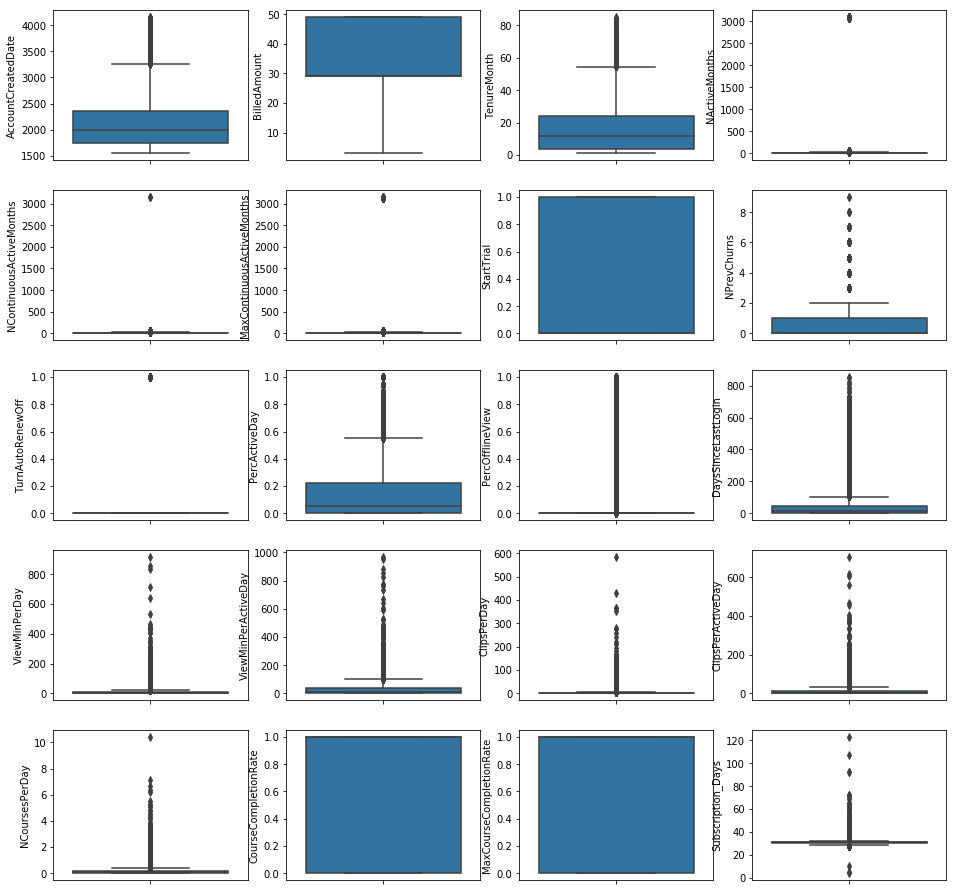

In [36]:
f, axes = plt.subplots(5, 4, figsize=(16, 16), sharex=True)
sns.boxplot( df_clean[numerical_variables[0]] , ax=axes[0, 0], orient='v')
sns.boxplot( df_clean[numerical_variables[1]] , ax=axes[0, 1], orient='v')
sns.boxplot( df_clean[numerical_variables[2]] , ax=axes[0, 2], orient='v')
sns.boxplot( df_clean[numerical_variables[3]] , ax=axes[0, 3], orient='v')
sns.boxplot( df_clean[numerical_variables[4]] , ax=axes[1, 0], orient='v')
sns.boxplot( df_clean[numerical_variables[5]] , ax=axes[1, 1], orient='v')
sns.boxplot( df_clean[numerical_variables[6]] , ax=axes[1, 2], orient='v')
sns.boxplot( df_clean[numerical_variables[7]] , ax=axes[1, 3], orient='v')
sns.boxplot( df_clean[numerical_variables[8]] , ax=axes[2, 0], orient='v')
sns.boxplot( df_clean[numerical_variables[9]] , ax=axes[2, 1], orient='v')
sns.boxplot( df_clean[numerical_variables[10]] , ax=axes[2, 2], orient='v')
sns.boxplot( df_clean[numerical_variables[11]] , ax=axes[2, 3], orient='v')
sns.boxplot( df_clean[numerical_variables[12]] , ax=axes[3, 0], orient='v')
sns.boxplot( df_clean[numerical_variables[13]] , ax=axes[3, 1], orient='v')
sns.boxplot( df_clean[numerical_variables[14]] , ax=axes[3, 2], orient='v')
sns.boxplot( df_clean[numerical_variables[15]] , ax=axes[3, 3], orient='v')
sns.boxplot( df_clean[numerical_variables[16]] , ax=axes[4, 0], orient='v')
sns.boxplot( df_clean[numerical_variables[17]] , ax=axes[4, 1], orient='v')
sns.boxplot( df_clean[numerical_variables[18]] , ax=axes[4, 2], orient='v')
sns.boxplot( df_clean[numerical_variables[19]] , ax=axes[4, 3], orient='v')

In [37]:
# The box plots show how some of the variables in the data set have extreme outliers. The clearest ones are 
# NActiveMonths, NContinuousActiveMonths, MaxContinuousActiveMonths which have values that represent accounts older than
# 250 years, which clearly doesn't make sense. Others aren't as clear, since I don't have the domain knowledge of the inner
# workings of the company. For example, NCoursesPerDay has a quite a few outliers completing over 2 courses per day. This
# could be a true outlier or perhaps there are mini courses that can be completed in a short amount of time. 

In [38]:
# I will proceed to remove these outliers using IQRx1.5 as a limit on for these extreme values. I'll only do this for 
# outliers that I consider clearly off and extreme.

In [39]:
extreme_variables_outliers = ['AccountCreatedDate','TenureMonth','NActiveMonths','NContinuousActiveMonths',
                              'MaxContinuousActiveMonths','TurnAutoRenewOff','DaysSinceLastLogin','ViewMinPerDay',
                              'ViewMinPerActiveDay','ClipsPerDay','ClipsPerActiveDay','Subscription_Days']

In [40]:
for variable in extreme_variables_outliers:
    q75, q25 = np.percentile(df_clean[variable], [75 ,25])
    iqr = q75 - q25
    min_value = q25 - (iqr*1.5)
    max_value = q75 + (iqr*1.5)
    df_clean[variable] = df_clean[variable].apply(lambda x:max_value if x > max_value else x)
    df_clean[variable] = df_clean[variable].apply(lambda x:min_value if x < min_value else x)

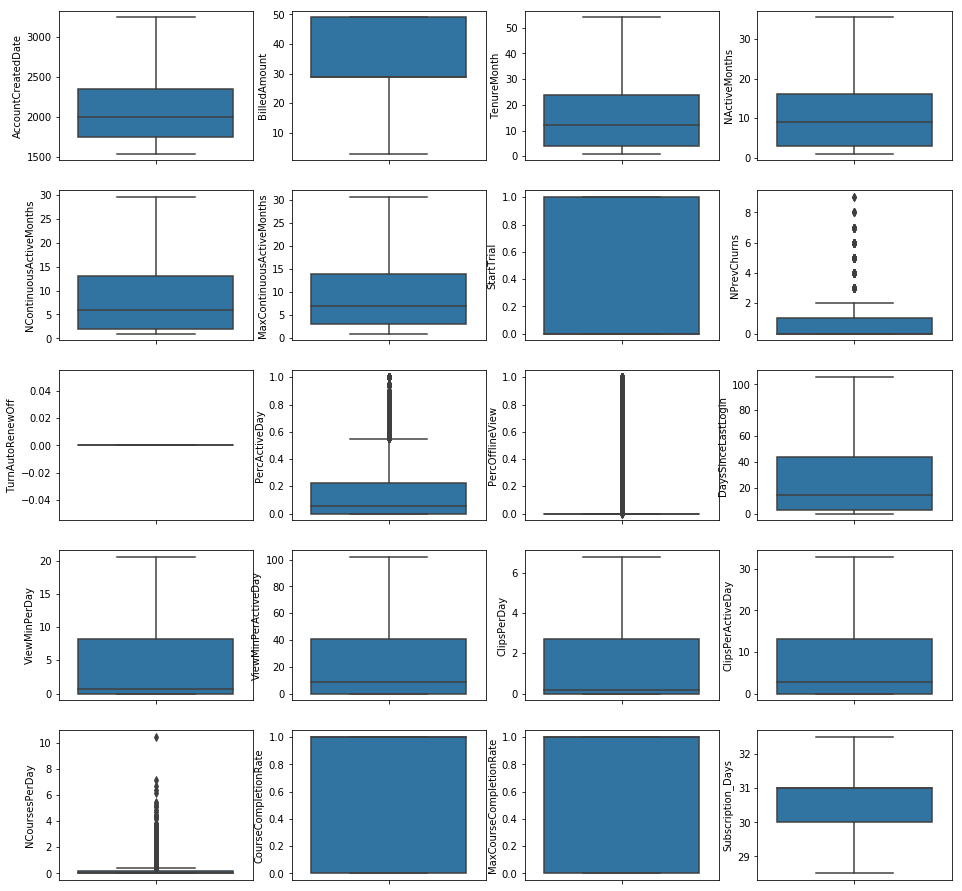

In [41]:
f, axes = plt.subplots(5, 4, figsize=(16, 16), sharex=True)
sns.boxplot( df[numerical_variables[0]] , ax=axes[0, 0], orient='v')
sns.boxplot( df[numerical_variables[1]] , ax=axes[0, 1], orient='v')
sns.boxplot( df[numerical_variables[2]] , ax=axes[0, 2], orient='v')
sns.boxplot( df[numerical_variables[3]] , ax=axes[0, 3], orient='v')
sns.boxplot( df[numerical_variables[4]] , ax=axes[1, 0], orient='v')
sns.boxplot( df[numerical_variables[5]] , ax=axes[1, 1], orient='v')
sns.boxplot( df[numerical_variables[6]] , ax=axes[1, 2], orient='v')
sns.boxplot( df[numerical_variables[7]] , ax=axes[1, 3], orient='v')
sns.boxplot( df[numerical_variables[8]] , ax=axes[2, 0], orient='v')
sns.boxplot( df[numerical_variables[9]] , ax=axes[2, 1], orient='v')
sns.boxplot( df[numerical_variables[10]] , ax=axes[2, 2], orient='v')
sns.boxplot( df[numerical_variables[11]] , ax=axes[2, 3], orient='v')
sns.boxplot( df[numerical_variables[12]] , ax=axes[3, 0], orient='v')
sns.boxplot( df[numerical_variables[13]] , ax=axes[3, 1], orient='v')
sns.boxplot( df[numerical_variables[14]] , ax=axes[3, 2], orient='v')
sns.boxplot( df[numerical_variables[15]] , ax=axes[3, 3], orient='v')
sns.boxplot( df[numerical_variables[16]] , ax=axes[4, 0], orient='v')
sns.boxplot( df[numerical_variables[17]] , ax=axes[4, 1], orient='v')
sns.boxplot( df[numerical_variables[18]] , ax=axes[4, 2], orient='v')
sns.boxplot( df[numerical_variables[19]] , ax=axes[4, 3], orient='v')

In [42]:
# Now, all the variables that, in my opinon, had clear clear issues with outliers have been corrected.

In [43]:
# There are 155 unique values in CountryCode, which would make the dataframe too wide and hurt performance of the model.
len(df_clean['CountryCode'].unique())

155

In [44]:
df_clean['CountryCode'].value_counts()[:12]

US    24214
GB     4439
CA     1689
AU     1511
IN     1465
SE      728
DE      646
NL      643
DK      482
BR      475
IL      449
NO      406
Name: CountryCode, dtype: int64

In [45]:
df_clean['CountryCode'].value_counts()[:12].sum()/len(df_clean['CountryCode'])

0.8652923363615187

In [46]:
# Since 86.53% of the clients resides in the top 12 countries by client, I will assign a value of 'Other' to countries
# outside the top 12

In [47]:
top12_countries = df_clean['CountryCode'].value_counts()[:12].index

In [48]:
df_clean['CountryCode'] = df_clean['CountryCode'].apply(lambda x:'Other' if x not in top12_countries else x)

In [49]:
# Change target variable into 1 for a succesful renewal or 0 for churned
df_clean['EndingState'] = df_clean['EndingState'].apply(lambda x:0 if x == 'Ended' or x == 'Cancelled' else 1)

In [50]:
# Copy of the dataframe to be used for modelling
df_model = pd.get_dummies(df_clean)

# Modelling

In [51]:
df_model['EndingState'].value_counts()

1    35550
0     7380
Name: EndingState, dtype: int64

In [52]:
# The target variable is unbalanced, with a lot more cases for class 1. 
# After the train test split, I will rebalance the train set using SMOTE, without touching the test set.

In [53]:
#Train Test Split
X = df_model.drop(['EndingState'],axis=1)
Y = df_model['EndingState']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

### Upsampling Minority Class

In [54]:
# Given that this is a classification problem, it is important to balance the target variable. Otherwise, the model could
# just predict the result for the majority class and have a deceivingly high accuracy.

In [55]:
# Applying SMOTE to generate synthetic samples of the minority class to create balance
sm = SMOTE()
X_upsampled, y_upsampled = sm.fit_sample(X_train, y_train)

In [56]:
np.bincount(y_upsampled)

array([24859, 24859])

In [57]:
# Both classes are balanced

### Logistic Regression

In [58]:
logreg = LogisticRegression()

In [59]:
logreg.fit(X_upsampled, y_upsampled)
y_pred_logreg = logreg.predict(X_test)

In [90]:
scores = cross_val_score(logreg, X_upsampled, y_upsampled, cv=10)
print("Cross Val Model Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross Val Model Accuracy: 0.80 (+/- 0.06)


In [61]:
confusion_matrix(y_test, y_pred_logreg)

array([[ 1252,   936],
       [  674, 10017]])

In [62]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_logreg).ravel()

In [63]:
sensitivity_logreg = tp / (tp+fn)
specificity_logreg = tn / (tn+fp)
print('Sensitivity: '+ str(sensitivity_logreg))
print('Specificity: '+ str(specificity_logreg))

Sensitivity: 0.9369563183986531
Specificity: 0.5722120658135283


In [94]:
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.65      0.57      0.61      2188
           1       0.91      0.94      0.93     10691

   micro avg       0.87      0.87      0.87     12879
   macro avg       0.78      0.75      0.77     12879
weighted avg       0.87      0.87      0.87     12879



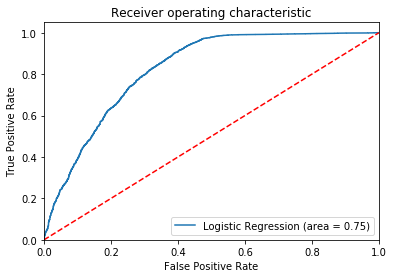

In [95]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Naive Bayes

In [65]:
bnb = BernoulliNB()

In [66]:
bnb.fit(X_upsampled, y_upsampled)
y_pred_bnb = bnb.predict(X_test)

In [93]:
scores = cross_val_score(bnb, X_upsampled, y_upsampled, cv=10)
print("Cross Val Model Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross Val Model Accuracy: 0.83 (+/- 0.09)


In [68]:
confusion_matrix(y_test, y_pred_bnb)

array([[1358,  830],
       [1365, 9326]])

In [69]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_bnb).ravel()

In [70]:
sensitivity_bnb = tp / (tp+fn)
specificity_bnb = tn / (tn+fp)
print('Sensitivity: '+ str(sensitivity_bnb))
print('Specificity: '+ str(specificity_bnb))

Sensitivity: 0.8723225142643345
Specificity: 0.6206581352833638


In [98]:
print(classification_report(y_test, y_pred_bnb))

              precision    recall  f1-score   support

           0       0.50      0.62      0.55      2188
           1       0.92      0.87      0.89     10691

   micro avg       0.83      0.83      0.83     12879
   macro avg       0.71      0.75      0.72     12879
weighted avg       0.85      0.83      0.84     12879



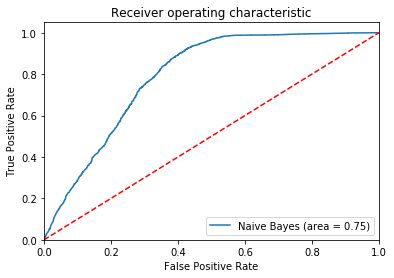

In [100]:
bnb_roc_auc = roc_auc_score(y_test, bnb.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, bnb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Naive Bayes (area = %0.2f)' % bnb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Random Forest

In [72]:
rfc = ensemble.RandomForestClassifier(n_estimators=100)

In [73]:
rfc.fit(X_upsampled, y_upsampled)
y_pred_rfc = rfc.predict(X_test)

In [91]:
scores = cross_val_score(rfc, X_upsampled, y_upsampled, cv=10)
print("Cross Val Model Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross Val Model Accuracy: 0.93 (+/- 0.21)


In [76]:
confusion_matrix(y_test, y_pred_rfc)

array([[ 1063,  1125],
       [  227, 10464]])

In [77]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rfc).ravel()

In [78]:
sensitivity_rfc = tp / (tp+fn)
specificity_rfc = tn / (tn+fp)
print('Sensitivity: '+ str(sensitivity_rfc))
print('Specificity: '+ str(specificity_rfc))

Sensitivity: 0.978767187353849
Specificity: 0.48583180987202923


In [96]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.82      0.49      0.61      2188
           1       0.90      0.98      0.94     10691

   micro avg       0.90      0.90      0.90     12879
   macro avg       0.86      0.73      0.78     12879
weighted avg       0.89      0.90      0.88     12879



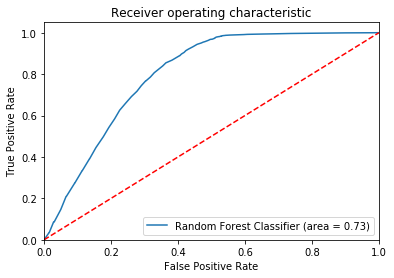

In [97]:
rfc_roc_auc = roc_auc_score(y_test, rfc.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Classifier (area = %0.2f)' % rfc_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### K Nearest Neighbors

In [80]:
knn = neighbors.KNeighborsClassifier(n_neighbors=2)

In [81]:
knn.fit(X_upsampled, y_upsampled)
y_pred_knn = knn.predict(X_test)

In [92]:
scores = cross_val_score(knn, X_upsampled, y_upsampled, cv=10)
print("Cross Val Model Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross Val Model Accuracy: 0.79 (+/- 0.02)


In [83]:
confusion_matrix(y_test, y_pred_knn)

array([[1148, 1040],
       [4004, 6687]])

In [84]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_knn).ravel()

In [85]:
sensitivity_knn = tp / (tp+fn)
specificity_knn = tn / (tn+fp)
print('Sensitivity: '+ str(sensitivity_knn))
print('Specificity: '+ str(specificity_knn))

Sensitivity: 0.6254793751753812
Specificity: 0.5246800731261426


In [101]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.22      0.52      0.31      2188
           1       0.87      0.63      0.73     10691

   micro avg       0.61      0.61      0.61     12879
   macro avg       0.54      0.58      0.52     12879
weighted avg       0.76      0.61      0.66     12879



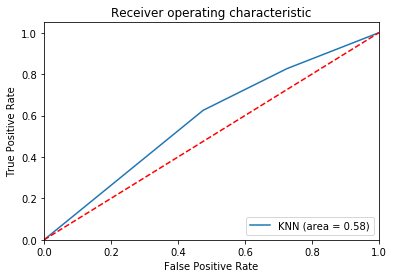

In [102]:
knn_roc_auc = roc_auc_score(y_test, knn.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Logistic Regression
Cross Val Model Accuracy: 0.80 (+/- 0.06)<br>
Sensitivity: 0.9369563183986531<br>
Specificity: 0.5722120658135283<br>
Weighted Avg F1: 0.87<br>
ROC Curve Area: 0.75<br>
### Naive Bayes
Cross Val Model Accuracy: 0.83 (+/- 0.09)<br>
Sensitivity: 0.8723225142643345<br>
Specificity: 0.6206581352833638<br>
Weighted Avg F1: 0.84<br>
ROC Curve Area: 0.75<br>
### Random Forest
Cross Val Model Accuracy: 0.93 (+/- 0.21)<br>
Sensitivity: 0.978767187353849<br>
Specificity: 0.48583180987202923<br>
Weighted Avg F1: 0.88<br>
ROC Curve Area: 0.73<br>
### KNN
Cross Val Model Accuracy: 0.79 (+/- 0.02)<br>
Sensitivity: 0.6254793751753812<br>
Specificity: 0.5246800731261426<br>
Weighted Avg F1: 0.66<br>
ROC Curve Area: 0.58<br>

## Conclusion
After evaluating all the different metrics, I think it is safe to say that the KNN and Random Forest models can be discarded from the final selection. 

The KNN model has an almost flat curve on the ROC graph, producing the lowest area among all the models. This shows what the values sensitivity and specificity represent, that the model isn't very good at finding true positives and true negatives. It has the lowest F1 score, so this wouldn't be a good choice for this data set.

The Random Forest model has the highest accuracy, but it seems overfitted. K-folds cross validation returned an average accuracy of 0.93 with a standard deviation of +/- 0.21. On the plus side, it has the highest F1 score and sensitivity. However, because of how overfitted it is, it wouldn't perform well with different data sets.

The final two models, Logistic Regression and Naive Bayes, would both be good choices. They have similar metrics and performed well all around. The main difference is how important sensitivity is to the problem at hand. If its more important to figure out why customers renew memberships, then the Logistic Regression model would be a better choice because of its higher sensitivity. 